In [1]:
!pip uninstall tensorflow --yes
!pip uninstall keras --yes

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: keras 3.2.1
Uninstalling keras-3.2.1:
  Successfully uninstalled keras-3.2.1


In [2]:
!pip install tensorflow==2.8.0
!pip install keras==2.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 31.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
  Attempting uninstal

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-classification/WELFake_Dataset.csv
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv
/kaggle/input/glove6b300dtxt/glove.6B.300d.txt


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
fake=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
fake['fake']=1
fake['true']=0
true['true']=1
true['fake']=0
fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)
News=pd.concat([fake,true],ignore_index=True)
News.info
News


/kaggle/input/fake-news-classification/WELFake_Dataset.csv
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv
/kaggle/input/glove6b300dtxt/glove.6B.300d.txt


,text,fake,true
0,Donald Trump just couldn t wish all Americans ...,1,0
1,House Intelligence Committee Chairman Devin Nu...,1,0
2,"On Friday, it was revealed that former Milwauk...",1,0
3,"On Christmas day, Donald Trump announced that ...",1,0
4,Pope Francis used his annual Christmas Day mes...,1,0
...,...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",0,1
44895,MINSK (Reuters) - In the shadow of disused Sov...,0,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,0,1


In [5]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [6]:
## Word Pre-Processing ##
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Lowercasing
    text = text.lower()

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

# Apply preprocessing to data
#data['text'] = data['text'].apply(preprocess_text)

## Apply the written function ##
News['text'] = News['text'].apply(preprocess_text)
processed_list = []
for j in News['text']:
    process = j.replace('...','')
    processed_list.append(process)
    
df_processed = pd.DataFrame(processed_list)
df_processed.columns = ['text']
df_processed.head(n=5)

,text
0,donald trump wish american happy new year leav...
1,house intelligence committee chairman devin nu...
2,friday revealed former milwaukee sheriff david...
3,christmas day donald trump announced would bac...
4,pope francis used annual christmas day message...


In [7]:
X = list(df_processed['text']);
y_data = News[["fake","true"]]
y = y_data.values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15, train_size=0.85)

In [9]:

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import Bidirectional,GRU,concatenate,SpatialDropout1D
from keras.layers import GlobalMaxPooling1D,GlobalAveragePooling1D,Conv1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import matplotlib.pyplot as plt
from keras import layers
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
######## Textual Features for Embedding ###################
max_len = 100
max_features = 10000
embed_size = 300
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train)+list(x_test))
x_train = tokenizer.texts_to_sequences(x_train)
x_test= tokenizer.texts_to_sequences(x_test)
x_train = pad_sequences(x_train, padding='post', maxlen=max_len)
x_test = pad_sequences(x_test, padding='post', maxlen=max_len)

In [10]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open("/kaggle/input/glove6b300dtxt/glove.6B.300d.txt", encoding="utf8") ## pre-trained or self trained global vectors file ##
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()
vocab_size = len(tokenizer.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer.word_index
num_words = min(max_features,len(word_index)+1)
embedding_matrix = zeros((num_words, embed_size)) ## has to be similar to glove dimension ##
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [11]:
from tensorflow.keras.layers import BatchNormalization

sequence_input = Input(shape=(max_len, ))
x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
avg_pool = GlobalAveragePooling1D()(x)
x = Dense(128)(avg_pool)  # Remove activation
x = BatchNormalization()(x)  # Add BatchNormalization
x = Activation('relu')(x)  # Add activation after BatchNormalization
x = Dropout(0.1)(x)
preds = Dense(2, activation="sigmoid")(x)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-3), metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          3000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 300)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 98, 64)            57664     
                                                                 
 bidirectional (Bidirectiona  (None, 98, 256)          197632    
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 256)              0     

/opt/conda/lib/python3.10/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [12]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5,
                    verbose=1, validation_split=0.2)
model.save_weights("./DLPProject.h5")

Epoch 1/5
239/239 [==============================] - 165s 662ms/step - loss: 0.2206 - accuracy: 0.9115 - val_loss: 0.3894 - val_accuracy: 0.8204
Epoch 2/5
239/239 [==============================] - 161s 672ms/step - loss: 0.1168 - accuracy: 0.9551 - val_loss: 0.1642 - val_accuracy: 0.9350
Epoch 3/5
239/239 [==============================] - 162s 679ms/step - loss: 0.0916 - accuracy: 0.9650 - val_loss: 0.0916 - val_accuracy: 0.9649
Epoch 4/5
239/239 [==============================] - 162s 680ms/step - loss: 0.0770 - accuracy: 0.9715 - val_loss: 0.0799 - val_accuracy: 0.9701
Epoch 5/5
239/239 [==============================] - 162s 678ms/step - loss: 0.0676 - accuracy: 0.9761 - val_loss: 0.1148 - val_accuracy: 0.9555


In [13]:
model.save("model.h5")


In [14]:
score = model.evaluate(x_test, y_test, verbose=1)

211/211 [==============================] - 9s 41ms/step - loss: 0.1197 - accuracy: 0.9566


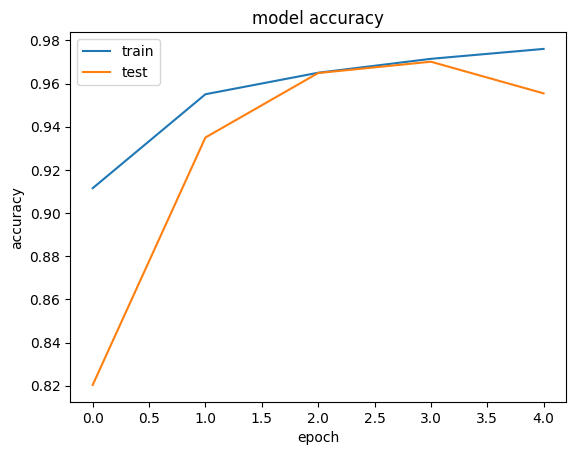

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

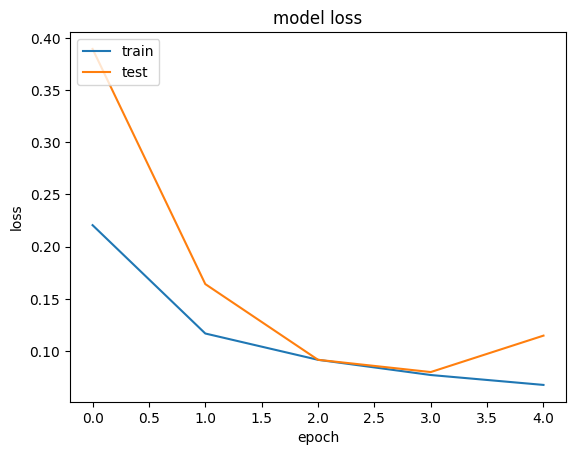

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text_test(text):
    # Ensure text is a string
    text = str(text)
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Lowercasing
    text = text.lower()

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

In [18]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
new_data = pd.read_csv('//kaggle/input/fake-news-classification/WELFake_Dataset.csv')

# Assuming 'text' column holds the text and 'label' is the target
texts = new_data['text'].apply(preprocess_text_test)  # Use the same preprocessing function you used in training
labels = new_data['label']

# Additional cleaning specific to your dataset
#new_data['text'] = new_data['text'].replace(r'\.\.\.', '', regex=True)
max_len = 100
max_features = 10000
embed_size = 300
# Tokenize text
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
x_test = pad_sequences(sequences, maxlen=max_len)

# Convert labels to numpy array
import numpy as np
y_test = np.array(labels)

In [19]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('model.h5')

In [20]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_test_one_hot = to_categorical(y_test, num_classes=2)

loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

2255/2255 [==============================] - 95s 42ms/step - loss: 2.0403 - accuracy: 0.4673
Test Loss: 2.04028058052063, Test Accuracy: 0.46732470393180847
